In [1]:
thresh = 0.9934

In [2]:
from tensorflow.keras.callbacks import Callback
class myCallback(Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > thresh):   
            self.model.stop_training = True

In [3]:
callbacks = myCallback()

In [4]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [5]:
dataset = pd.read_csv('/Users/kshitijaupasham/Desktop/Datasets/A-ZLetters/A_Z Handwritten Data.csv')

In [6]:
X = dataset.drop('0',axis = 1)
Y = dataset['0']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [8]:
X_train = np.array(X_train).reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = np.array(X_test).reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
Y_test = pd.get_dummies(Y_test)
Y_train = pd.get_dummies(Y_train)

In [11]:
model = Sequential()

model.add(Conv2D(28,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(56, kernel_size = (3,3),activation ='relu',padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size = (3,3),activation ='relu',padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(256, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(128, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(26, activation = "softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         64640     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, callbacks=[callbacks])

Epoch 1/10
1677/1677 [==============================] - 325s 194ms/step - loss: 0.1558 - accuracy: 0.9560 - val_loss: 0.0512 - val_accuracy: 0.9858
Epoch 2/10
1677/1677 [==============================] - 305s 182ms/step - loss: 0.0506 - accuracy: 0.9856 - val_loss: 0.0485 - val_accuracy: 0.9867
Epoch 3/10
1677/1677 [==============================] - 336s 200ms/step - loss: 0.0378 - accuracy: 0.9891 - val_loss: 0.0543 - val_accuracy: 0.9845
Epoch 4/10
1677/1677 [==============================] - 328s 196ms/step - loss: 0.0322 - accuracy: 0.9906 - val_loss: 0.0380 - val_accuracy: 0.9901
Epoch 5/10
1677/1677 [==============================] - 316s 189ms/step - loss: 0.0249 - accuracy: 0.9927 - val_loss: 0.0303 - val_accuracy: 0.9923
Epoch 6/10
1677/1677 [==============================] - 307s 183ms/step - loss: 0.0210 - accuracy: 0.9940 - val_loss: 0.0348 - val_accuracy: 0.9908
Epoch 7/10
1677/1677 [==============================] - 300s 179ms/step - loss: 0.0169 - accuracy: 0.9949 - val_

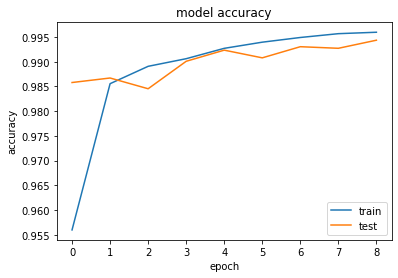

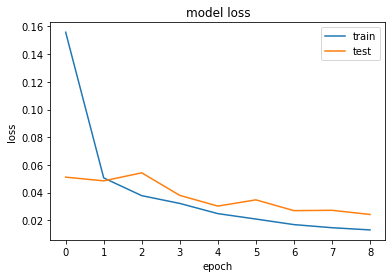

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [16]:
99.44

99.44